In [1]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator, Aer
from qiskit.quantum_info import Statevector
from qiskit.circuit.library import MCXGate


from qiskit.visualization import plot_histogram
from qiskit.visualization import plot_distribution 

import numpy as np
from math import pi

In [2]:
def perm():
    qc = QuantumCircuit(5)

    #00
    qc.x(0)
    qc.x(2)
    qc.x(3)
    gate = MCXGate(3)
    qc.append(gate, [0,  2, 3, 4])

    qc.x(2)


    qc.barrier()

    qc.cx(4,2)

    qc.barrier()

    #Disentangle

    gate = MCXGate(4)
    qc.append(gate, [0, 1, 2, 3, 4])

    qc.x(0)


    qc.barrier()
    #Another Adress

    qc.cx(4,0)
    qc.cx(4,1)
    qc.barrier()

    #Another Adress

    qc.x(1)
    qc.x(2)

    gate = MCXGate(4)
    qc.append(gate, [0, 1, 2, 3, 4])
    qc.x(1)
    qc.x(2)
    qc.x(3)

    qc.barrier()
    qc.cx(4,3)
    qc.barrier()

    #Disentangl


    gate = MCXGate(2)
    qc.append(gate, [0, 3, 4])
    
    qc.name="P"
    return qc

In [3]:
def grover():
    qc = QuantumCircuit(2)
    #Diffusor
    qc.h([0,1])
    qc.x([0,1])
    qc.h(0)
    qc.cx(1,0)
    qc.h(0)
    qc.barrier()
    qc.x([0,1])
    qc.h([0,1])

    qc.name="G"
    return qc

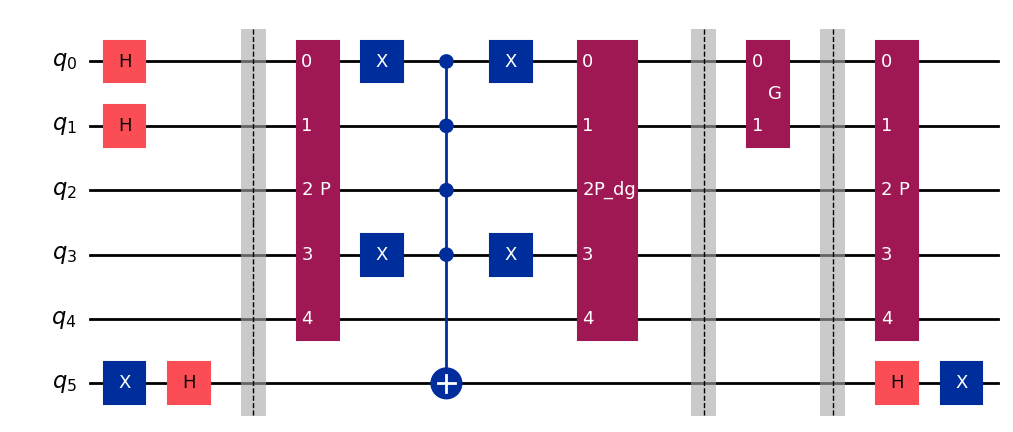

In [4]:
qc = QuantumCircuit(6)
qc.h(0)
qc.h(1)
qc.x(5)
qc.h(5)
qc.barrier()
qc.append(perm(),range(5))

#Oracle
gate = MCXGate(4)
qc.x(0)
qc.x(3)
qc.append(gate, [0, 1, 2, 3, 5])
qc.x(3)
qc.x(0)
qc.append(perm().inverse(),range(5))
qc.barrier()
qc.append(grover(),range(2))
qc.barrier()
qc.h(5)
qc.x(5)
qc.append(perm(),range(5))
qc.draw('mpl',fold=120)


Total count are: {np.str_('000110'): np.float64(0.999999999999999)}


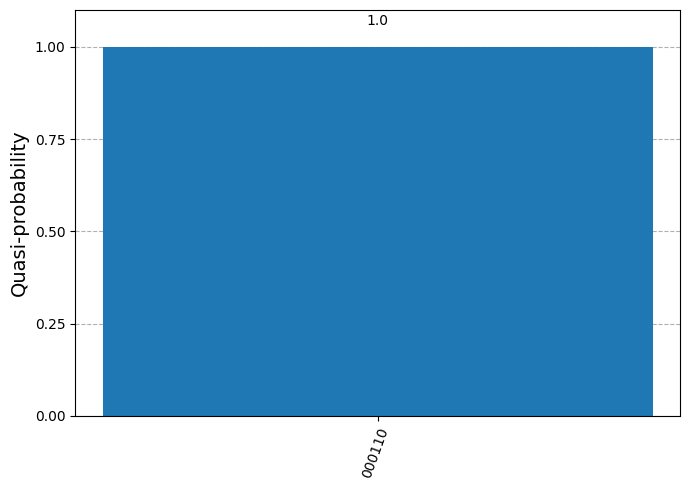

In [5]:
simulator = Aer.get_backend('statevector_simulator')
result=simulator.run(qc.decompose()).result()
counts = result.get_counts()
print("\nTotal count are:",counts)
plot_distribution(counts)

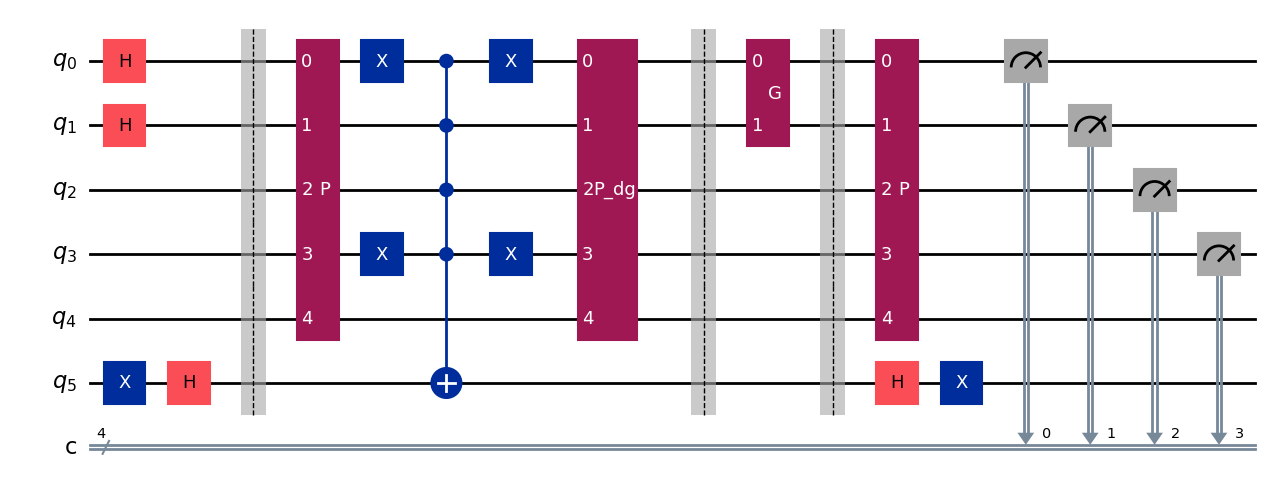

In [6]:
qc = QuantumCircuit(6,4)
qc.h(0)
qc.h(1)
qc.x(5)
qc.h(5)
qc.barrier()
qc.append(perm(),range(5))

#Oracle
gate = MCXGate(4)
qc.x(0)
qc.x(3)
qc.append(gate, [0, 1, 2, 3, 5])
qc.x(3)
qc.x(0)
qc.append(perm().inverse(),range(5))
qc.barrier()
qc.append(grover(),range(2))
qc.barrier()
qc.h(5)
qc.x(5)
qc.append(perm(),range(5))

qc.measure(0,0)
qc.measure(1,1)
qc.measure(2,2)
qc.measure(3,3)

qc.draw('mpl',fold=120)



Total count are: {'0110': 10000}


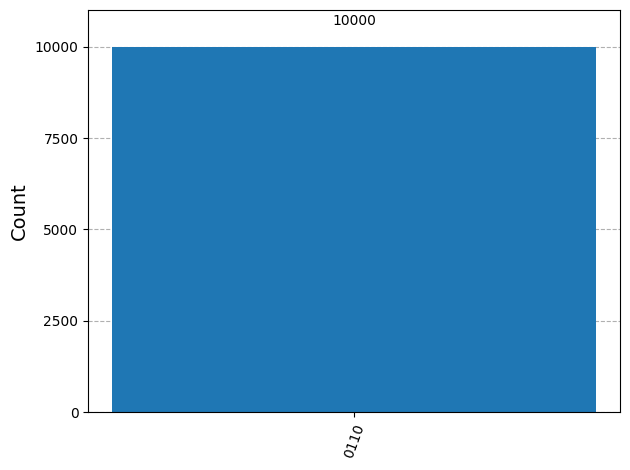

In [7]:
simulator = Aer.get_backend('qasm_simulator')
result=simulator.run(qc.decompose(),shots=10000).result()
counts = result.get_counts()
print("\nTotal count are:",counts)
plot_histogram(counts)

In [8]:
qc.decompose().depth()

101